In [1]:
# To pull data from google drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# to upload the Corpus 
corpus = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIB_Data/corpus.csv', header= None, skiprows=1, names= ['Company name', 'Text'])
corpus.head()

,Company name,Text
0,NYSE_BTE,eagl fordlloydminsterpeac rivervikingduvernayc...
1,TSX_CCL.BCA,annual letter to shareholdersn guillet directo...
2,ASX_ABC,adelaid brighton ltd annual report on energi e...
3,NYSE_AKS,ak steel annual report and form messag from ro...
4,NYSE_HOME,govern regul we are subject to labor and emplo...


In [3]:
# to upload Bloomberg scores 
scores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIB_Data/BB_Scores.csv')
scores

,Name,ENVIRON_DISCLOSURE_SCORE,Company name
0,A UN,NaN,Agilent Technologies Inc
1,AAL UW,NaN,American Airlines Group Inc
2,AAP UN,22.480620,Advance Auto Parts Inc
3,AAPL UW,NaN,Apple Inc
4,ABBV UN,NaN,AbbVie Inc
...,...,...,...
3822,Z UW,NaN,Zillow Group Inc
3823,ZBH UN,NaN,Zimmer Biomet Holdings Inc
3824,ZG UW,NaN,Zillow Group Inc
3825,ZION UW,7.142857,Zions Bancorp NA


In [4]:
# inner join between the corpus & the BB scores 
df = pd.merge(corpus, scores, on=['Company name'], how='inner')
df

,Company name,Text,Name,ENVIRON_DISCLOSURE_SCORE
0,Edison International,children servic social care servic for childre...,EIX UN,37.241379
1,Edison International,children servic social care servic for childre...,EIX UN,37.241379
2,Edison International,dear sharehold the alli team deliv except fina...,EIX UN,37.241379
3,Edison International,dear sharehold the alli team deliv except fina...,EIX UN,37.241379
4,Edison International,NaN,EIX UN,37.241379
...,...,...,...,...
652,Belimo Holding AG,sustain report our purposeto bring peopl and r...,BEAN SE,14.728682
653,Fiat Chrysler Automobiles NV,registr document getlink se getlink registr do...,FCA IM,65.891473
654,Barry Callebaut AG,gri report for sustain valu creation introduct...,BARN SE,24.031008
655,Partners Group Holding AG,sustain respons perform addendum to the annual...,PGHN SE,16.071429


In [5]:
# To remove duplicates:
df = df.drop_duplicates('Company name')
df

,Company name,Text,Name,ENVIRON_DISCLOSURE_SCORE
0,Edison International,children servic social care servic for childre...,EIX UN,37.241379
8,Phillips 66,welcom to australian ethic invest australian e...,PSX UN,37.984496
16,Sempra Energy,ﬁa lifetim of financi secur requir smart plan ...,SRE UN,46.206897
24,Weingarten Realty Investors,annual report expertis around the world and ac...,WRI UN,1.550388
25,Freeport-McMoRan Inc,dear fellow sharehold goodby zombi hello what ...,FCX UN,51.162791
...,...,...,...,...
652,Belimo Holding AG,sustain report our purposeto bring peopl and r...,BEAN SE,14.728682
653,Fiat Chrysler Automobiles NV,registr document getlink se getlink registr do...,FCA IM,65.891473
654,Barry Callebaut AG,gri report for sustain valu creation introduct...,BARN SE,24.031008
655,Partners Group Holding AG,sustain respons perform addendum to the annual...,PGHN SE,16.071429


In [6]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Set that word has to appear at least 5 times to be in vocab
min_df = 5
max_features = 1000
countVec = CountVectorizer(min_df = min_df, max_features = max_features )
# Learn vocabulary from train set
countVec.fit(df['Text'].values.astype('U'))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [7]:
# Transform list of review to matrix of bag-of-word vectors
trainX = countVec.transform(df['Text'].values.astype('U'))

In [8]:
import numpy as np
print("Shape of Train X {}\n".format(trainX.shape))
print("Sample of the vocab:\n {}".format(np.random.choice(countVec.get_feature_names(), 20)))

Shape of Train X (499, 1000)

Sample of the vocab:
 ['johnson' 'step' 'principl' 'monitor' 'consid' 'indirect' 'cover'
 'consumpt' 've' 'recycl' 'region' 'signific' 'stakehold' 'carri' 'come'
 'campaign' 'claim' 'januari' 'over' 'firm']


In [9]:
print(trainX)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	9
  (0, 3)	3
  (0, 4)	2
  (0, 5)	5
  (0, 6)	24
  (0, 7)	12
  (0, 8)	2
  (0, 9)	4
  (0, 10)	18
  (0, 11)	4
  (0, 12)	1
  (0, 13)	4
  (0, 14)	2
  (0, 15)	3
  (0, 16)	2
  (0, 17)	3
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 23)	2
  (0, 25)	4
  (0, 26)	5
  (0, 27)	4
  :	:
  (498, 975)	53
  (498, 976)	70
  (498, 977)	11
  (498, 978)	714
  (498, 979)	90
  (498, 980)	90
  (498, 981)	13
  (498, 982)	260
  (498, 983)	4
  (498, 984)	1490
  (498, 985)	122
  (498, 986)	33
  (498, 987)	30
  (498, 988)	243
  (498, 989)	197
  (498, 990)	47
  (498, 991)	25
  (498, 992)	24
  (498, 993)	3
  (498, 994)	21
  (498, 995)	388
  (498, 996)	12
  (498, 997)	9
  (498, 998)	2
  (498, 999)	30


In [10]:
trainY = df['ENVIRON_DISCLOSURE_SCORE']

In [11]:
trainY

0      37.241379
8      37.984496
16     46.206897
24      1.550388
25     51.162791
         ...    
652    14.728682
653    65.891473
654    24.031008
655    16.071429
656    66.666667
Name: ENVIRON_DISCLOSURE_SCORE, Length: 499, dtype: float64

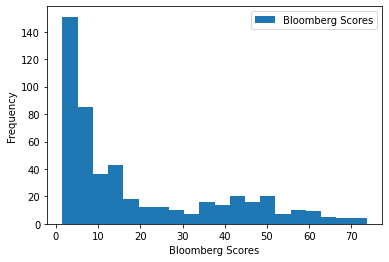

In [24]:
# the frequency distribution of BB scores 
import matplotlib.pyplot as plt
plt.hist(trainY, bins=20)
plt.xlabel('Bloomberg Scores')
plt.ylabel('Frequency')
plt.legend(['Bloomberg Scores']);

In [12]:
# Crearing training & testing sets
train_x = trainX[0:399]
train_y = trainY[0:399]
test_x = trainX[400:499]
test_y = trainY[400:499]


In [13]:
#Linear Regression
from sklearn import linear_model

In [14]:
# Training
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
rSquared = regr.score(train_x, train_y)

print(rSquared)

0.5049616082692112


In [15]:
#MSE
MSE = np.mean((regr.predict(train_x) - train_y)**2)
print(MSE)

112.51070780364977


In [27]:
# Testing:
y_predicted = regr.predict(test_x)
# MSE:
MSE1 = np.mean((y_predicted- test_y)**2)
print(MSE1)

45253.804765536
